## Test task for VeraData

### imports

In [88]:
!matplotlib inline
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier
from scipy import stats
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.impute import SimpleImputer

'matplotlib' is not recognized as an internal or external command,
operable program or batch file.


### few basic function calls to check the data

In [89]:
df = pd.read_csv('datasets_for_applicants\\train.csv',delimiter='|')

In [90]:
df.head()

,Unnamed: 0,VC_ID,VC_DATEMAIL,VC_DATERESP,VC_GIFT,VC_CATHA,VC_CATHMC,PX_WO_CRR,PX_WO_CRR6MTH,ax_donation_contribution_c,...,ax_scuba_diving,ax_adult_age_ranges_present_in_household_unknown_gender_18_24,ax_childrens_age_ranges_present_in_hhld_reseller_age_00_02_female,ax_home_owner_type_detail_rp,ax_home_market_value_deciles_estimated_rp,ax_home_property_type_rp,PX_WO_PMD,ax_home_loan_date_3_rp_year,PX_WO_PR,ax_sex
0,0,326417533784,2012-08-11,NaN,NaN,8,8,0.2754,0.2754,1.0,...,NaN,NaN,NaN,O,10.0,R,1998-07-01,NaN,1998-07-22,0.0
1,1,472446525086,2017-08-01,NaN,NaN,3,3,0.0526,0.0526,NaN,...,NaN,NaN,NaN,O,4.0,R,2011-10-03,NaN,2013-08-15,0.0
2,2,438087357784,2017-01-10,NaN,NaN,8,9,0.1111,0.1111,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2011-03-28,NaN,2011-05-06,1.0
3,3,472446537663,2017-08-01,NaN,NaN,7,8,0.1058,0.1058,1.0,...,NaN,NaN,NaN,O,7.0,R,2000-04-10,NaN,2000-09-21,0.0
4,4,326417580816,2012-08-11,NaN,NaN,3,5,0.1117,0.1117,1.0,...,NaN,NaN,NaN,O,1.0,R,2003-08-18,NaN,2003-09-11,NaN


In [91]:
#basic function for means, stds, quantiles, etc.
df.describe()

,Unnamed: 0,VC_ID,VC_GIFT,VC_CATHA,VC_CATHMC,PX_WO_CRR,PX_WO_CRR6MTH,ax_donation_contribution_c,ax_religious_inspirational,ax_apparel_mens_big_and_tall_c,...,ax_personicx_digital_cluster,ax_spose_income,VC_GIFTMAX1Y,PX_international_relief_CAG,PX_international_relief_CAG6MTH,ax_scuba_diving,ax_adult_age_ranges_present_in_household_unknown_gender_18_24,ax_childrens_age_ranges_present_in_hhld_reseller_age_00_02_female,ax_home_market_value_deciles_estimated_rp,ax_sex
count,200000.000000,2.000000e+05,8808.000000,200000.000000,200000.00000,188428.000000,188428.000000,111858.0,70330.0,27223.0,...,200000.00000,1.380510e+05,6287.000000,3261.000000,3261.000000,1274.0,89.0,3.0,141311.000000,131658.000000
mean,99999.500000,4.082329e+11,14.121895,8.810375,9.36939,0.117201,0.117201,1.0,1.0,1.0,...,39.19880,1.958682e+05,16.952609,27.971184,27.971184,1.0,1.0,1.0,5.011301,0.501443
std,57735.171256,6.074813e+10,11.464322,13.207149,13.48172,0.122159,0.122159,0.0,0.0,0.0,...,11.64069,2.894859e+05,30.153027,49.415360,49.415360,0.0,0.0,0.0,2.626478,0.500000
min,0.000000,2.834680e+11,0.350000,0.000000,0.00000,0.000000,0.000000,1.0,1.0,1.0,...,1.00000,-1.270913e+05,1.000000,0.400000,0.400000,1.0,1.0,1.0,1.000000,0.000000
25%,49999.750000,3.607773e+11,10.000000,1.000000,2.00000,0.046500,0.046500,1.0,1.0,1.0,...,34.00000,5.600109e+04,10.000000,10.000000,10.000000,1.0,1.0,1.0,3.000000,0.000000
50%,99999.500000,4.123174e+11,10.000000,3.000000,4.00000,0.089600,0.089600,1.0,1.0,1.0,...,46.00000,7.270010e+04,10.000000,20.000000,20.000000,1.0,1.0,1.0,5.000000,1.000000
75%,149999.250000,4.466768e+11,20.000000,10.000000,11.00000,0.150400,0.150400,1.0,1.0,1.0,...,47.00000,1.032758e+05,20.000000,25.000000,25.000000,1.0,1.0,1.0,7.000000,1.000000
max,199999.000000,4.724468e+11,250.000000,158.000000,161.00000,1.000000,1.000000,1.0,1.0,1.0,...,49.00000,2.033672e+06,1500.000000,1001.000000,1001.000000,1.0,1.0,1.0,10.000000,1.000000


#### as VC_DATERESP is a column that indicates the date of the response I am deleting it from X features, as response date is a 100 percent indicator of the response itself.

In [92]:
df = df.drop(axis = 1, columns = 'VC_DATERESP')


#### Correlation matrix to check relationships of each variable

In [93]:
df.corr()

,Unnamed: 0,VC_ID,VC_GIFT,VC_CATHA,VC_CATHMC,PX_WO_CRR,PX_WO_CRR6MTH,ax_donation_contribution_c,ax_religious_inspirational,ax_apparel_mens_big_and_tall_c,...,ax_personicx_digital_cluster,ax_spose_income,VC_GIFTMAX1Y,PX_international_relief_CAG,PX_international_relief_CAG6MTH,ax_scuba_diving,ax_adult_age_ranges_present_in_household_unknown_gender_18_24,ax_childrens_age_ranges_present_in_hhld_reseller_age_00_02_female,ax_home_market_value_deciles_estimated_rp,ax_sex
Unnamed: 0,1.000000,0.002424,0.001879,-0.000246,-0.000161,0.000422,0.000422,NaN,NaN,NaN,...,0.002959,-0.006474,-0.019515,-0.002989,-0.002989,NaN,NaN,NaN,0.000946,0.002511
VC_ID,0.002424,1.000000,0.048866,0.048429,0.046967,-0.277685,-0.277685,NaN,NaN,NaN,...,0.023168,0.005763,0.068928,0.076479,0.076479,NaN,NaN,NaN,-0.011415,0.000901
VC_GIFT,0.001879,0.048866,1.000000,0.173046,0.173130,-0.082198,-0.082198,NaN,NaN,NaN,...,-0.044437,-0.033027,0.189179,0.590409,0.590409,NaN,NaN,NaN,-0.056246,0.009445
VC_CATHA,-0.000246,0.048429,0.173046,1.000000,0.998353,0.031066,0.031066,NaN,NaN,NaN,...,0.091140,-0.001299,0.075031,0.050454,0.050454,NaN,NaN,NaN,-0.018191,0.008391
VC_CATHMC,-0.000161,0.046967,0.173130,0.998353,1.000000,0.032481,0.032481,NaN,NaN,NaN,...,0.092398,-0.001279,0.076391,0.049506,0.049506,NaN,NaN,NaN,-0.018423,0.008285
PX_WO_CRR,0.000422,-0.277685,-0.082198,0.031066,0.032481,1.000000,1.000000,NaN,NaN,NaN,...,0.032757,-0.003308,-0.074234,-0.084146,-0.084146,NaN,NaN,NaN,0.024602,-0.001304
PX_WO_CRR6MTH,0.000422,-0.277685,-0.082198,0.031066,0.032481,1.000000,1.000000,NaN,NaN,NaN,...,0.032757,-0.003308,-0.074234,-0.084146,-0.084146,NaN,NaN,NaN,0.024602,-0.001304
ax_donation_contribution_c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ax_religious_inspirational,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ax_apparel_mens_big_and_tall_c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### i am creating the target column is_donated which:
### - equals to 1 if user gifted something
### - equals to 0 if user didn't gift anything.

In [94]:
df['is_donated'] = df['VC_GIFT'].notnull()

### count the number of donators

In [95]:
print(df['is_donated'].value_counts(dropna = False))
df_y = df['is_donated'].astype("int")


False    191192
True       8808
Name: is_donated, dtype: int64


#### this numbers indicate that almost all users are not donators, only 8k out of 200k donated anything

### checking the number of filled cells for each feature

In [96]:
df.notnull().sum()

Unnamed: 0                                                           200000
VC_ID                                                                200000
VC_DATEMAIL                                                          200000
VC_GIFT                                                                8808
VC_CATHA                                                             200000
VC_CATHMC                                                            200000
PX_WO_CRR                                                            188428
PX_WO_CRR6MTH                                                        188428
ax_donation_contribution_c                                           111858
ax_religious_inspirational                                            70330
ax_apparel_mens_big_and_tall_c                                        27223
ax_books_and_music_books_c                                            88287
ax_adult_age_ranges_present_in_household_females_75                   88068
ax_rfm_total

### checking the number of filled cells for each feature (for donators)

In [97]:
df[df['VC_GIFT'].notnull()].notnull().sum()

Unnamed: 0                                                           8808
VC_ID                                                                8808
VC_DATEMAIL                                                          8808
VC_GIFT                                                              8808
VC_CATHA                                                             8808
VC_CATHMC                                                            8808
PX_WO_CRR                                                            8324
PX_WO_CRR6MTH                                                        8324
ax_donation_contribution_c                                           6112
ax_religious_inspirational                                           3760
ax_apparel_mens_big_and_tall_c                                       1602
ax_books_and_music_books_c                                           4565
ax_adult_age_ranges_present_in_household_females_75                  4583
ax_rfm_total_offline_orders_under_50_r

### replacing NaNs for binary variables by 0
### here i assume that if the column isn't filled it's False for binary features

In [98]:
for column in df:
    #ax_spose_income is float, that's why i am excluding it
    if str(column).startswith('ax') and not(str(column).startswith('ax_spose_income')):
        df[column].fillna(0,inplace = True)

### replacing any NaNs with column's median for nonbinary features

In [99]:
df = df.fillna(df.median())

In [100]:
df.head()

,Unnamed: 0,VC_ID,VC_DATEMAIL,VC_GIFT,VC_CATHA,VC_CATHMC,PX_WO_CRR,PX_WO_CRR6MTH,ax_donation_contribution_c,ax_religious_inspirational,...,ax_adult_age_ranges_present_in_household_unknown_gender_18_24,ax_childrens_age_ranges_present_in_hhld_reseller_age_00_02_female,ax_home_owner_type_detail_rp,ax_home_market_value_deciles_estimated_rp,ax_home_property_type_rp,PX_WO_PMD,ax_home_loan_date_3_rp_year,PX_WO_PR,ax_sex,is_donated
0,0,326417533784,2012-08-11,10.0,8,8,0.2754,0.2754,1.0,0.0,...,0.0,0.0,O,10.0,R,1998-07-01,0,1998-07-22,0.0,False
1,1,472446525086,2017-08-01,10.0,3,3,0.0526,0.0526,0.0,1.0,...,0.0,0.0,O,4.0,R,2011-10-03,0,2013-08-15,0.0,False
2,2,438087357784,2017-01-10,10.0,8,9,0.1111,0.1111,0.0,0.0,...,0.0,0.0,0,0.0,0,2011-03-28,0,2011-05-06,1.0,False
3,3,472446537663,2017-08-01,10.0,7,8,0.1058,0.1058,1.0,1.0,...,0.0,0.0,O,7.0,R,2000-04-10,0,2000-09-21,0.0,False
4,4,326417580816,2012-08-11,10.0,3,5,0.1117,0.1117,1.0,1.0,...,0.0,0.0,O,1.0,R,2003-08-18,0,2003-09-11,0.0,False


#### The set of features were chosen based on number of missing records and corr matrix. 
##### Such features as  ax_scuba_diving, ax_adult_age_ranges_present_in_household_unknown_gender_18_24                            ,ax_childrens_age_ranges_present_in_hhld_reseller_age_00_02_female, etc. were not chosen as the records count for these features are too low. 

#### few histograms for features distr

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A486DBF8C8>]],
      dtype=object)

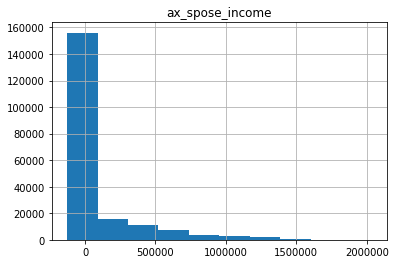

In [101]:
df.hist(column = ['ax_spose_income'])

In [102]:
df['ax_spose_income'].value_counts()

7.270010e+04    61954
4.593173e+05        6
4.343848e+04        6
5.380394e+04        6
1.138560e+06        5
                ...  
4.864022e+04        1
4.990085e+04        1
5.906414e+04        1
9.862529e+05        1
6.622328e+04        1
Name: ax_spose_income, Length: 112438, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A483F0AC08>,
      dtype=object)

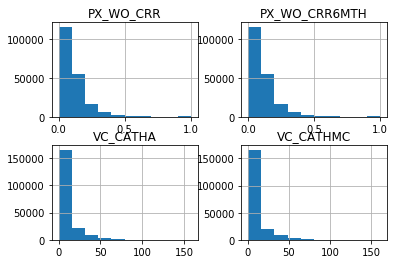

In [103]:
df.hist(column = ['VC_CATHA', 'VC_CATHMC','PX_WO_CRR', 'PX_WO_CRR6MTH'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A4D84572C8>,
      dtype=object)

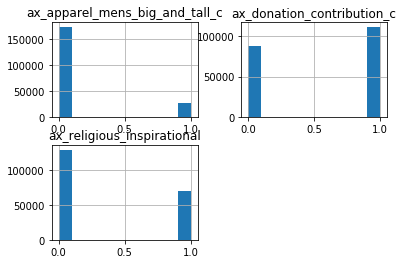

In [104]:
#some binary features
df.hist(column = ['ax_donation_contribution_c', 'ax_religious_inspirational',
        'ax_apparel_mens_big_and_tall_c'])

### almost all of these features were NaNs, so NaNs were replaced by the median. I am not including them in the model

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A481BC3488>,
      dtype=object)

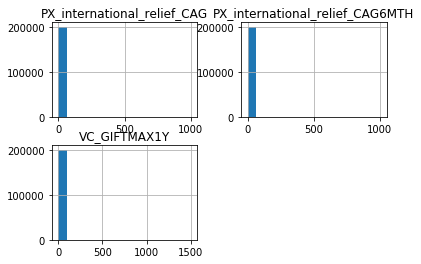

In [105]:
df.hist(column = ['VC_GIFTMAX1Y', 'PX_international_relief_CAG', 'PX_international_relief_CAG6MTH'], bins = 15)

In [106]:
df['PX_international_relief_CAG'].value_counts()

20.00     197024
25.00        775
10.00        517
5.00         330
50.00        243
           ...  
105.00         1
43.00          1
9.17           1
1.20           1
2.06           1
Name: PX_international_relief_CAG, Length: 128, dtype: int64

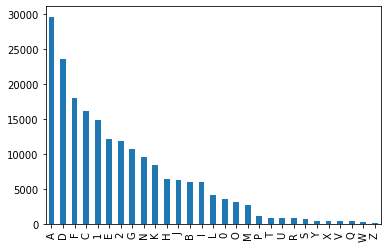

In [107]:
#categorical features
df['ax_income_range_premium_sc'].value_counts().plot(kind='bar')

#['ax_income_range_premium_sc', 'ax_income_range_broad_sc']

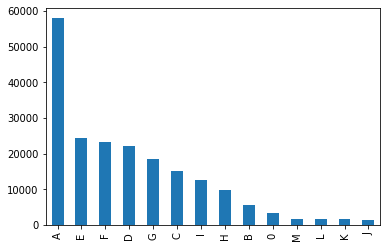

In [108]:
df['ax_income_range_broad_sc'].value_counts().plot(kind='bar')

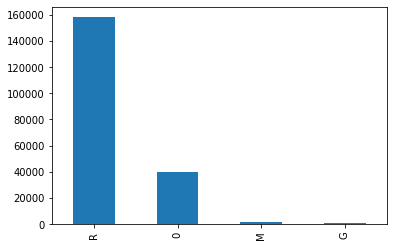

In [109]:
df['ax_home_property_type_rp'].value_counts().plot(kind='bar')

In [110]:
#here I set all features for modelling
df_new = df[['VC_CATHA', 'VC_CATHMC','PX_WO_CRR', 'PX_WO_CRR6MTH','ax_donation_contribution_c', 'ax_religious_inspirational',
        'ax_apparel_mens_big_and_tall_c', 'ax_income_range_premium_sc', 'ax_donation_contribution_c',
             'ax_income_range_broad_sc', 'ax_spose_income', 'ax_home_property_type_rp'
        ]] 



In [111]:
#dummies vars for categorical features
df = pd.get_dummies(data = df_new, columns =['ax_income_range_premium_sc', 'ax_income_range_broad_sc', 'ax_home_property_type_rp'])

In [112]:
df.head()

,VC_CATHA,VC_CATHMC,PX_WO_CRR,PX_WO_CRR6MTH,ax_donation_contribution_c,ax_religious_inspirational,ax_apparel_mens_big_and_tall_c,ax_donation_contribution_c,ax_spose_income,ax_income_range_premium_sc_0,...,ax_income_range_broad_sc_H,ax_income_range_broad_sc_I,ax_income_range_broad_sc_J,ax_income_range_broad_sc_K,ax_income_range_broad_sc_L,ax_income_range_broad_sc_M,ax_home_property_type_rp_0,ax_home_property_type_rp_G,ax_home_property_type_rp_M,ax_home_property_type_rp_R
0,8,8,0.2754,0.2754,1.0,0.0,0.0,1.0,419196.262254,0,...,0,0,0,0,0,0,0,0,0,1
1,3,3,0.0526,0.0526,0.0,1.0,0.0,0.0,72700.100721,0,...,0,0,0,0,0,0,0,0,0,1
2,8,9,0.1111,0.1111,0.0,0.0,0.0,0.0,95485.609475,0,...,0,0,0,0,0,0,1,0,0,0
3,7,8,0.1058,0.1058,1.0,1.0,1.0,1.0,624150.039045,0,...,0,0,0,0,0,0,0,0,0,1
4,3,5,0.1117,0.1117,1.0,1.0,0.0,1.0,72700.100721,0,...,0,0,0,0,0,1,0,0,0,1


#### Training models on the dataset

In [113]:
#split for model
X_train, X_val, y_train, y_val  = train_test_split(df, df_y, random_state = 0)

In [114]:
print(y_train.value_counts())
print(y_val.value_counts())

0    143309
1      6691
Name: is_donated, dtype: int64
0    47883
1     2117
Name: is_donated, dtype: int64


#### models for classificaton:
#### 1. DecissionTreeClassifier - tree algorigthm that build a decission tree that distinguishes a set into 2 categories
#### 2. RandomForrest - combination of DecissionTreeClassifiers that is averaging out to fight some cons of DTC(pt.2)
#### 3. MLP/SVC - multilayer perceptron (neural network with few hidden layers)/linear Support Vector Machine

#### DecisionTreeClassifier

In [115]:
tree_class = DecisionTreeClassifier()
tree_class.fit(X_train, y_train)
print("train set prediction: {}".format(tree_class.score(X_train, y_train)))
print("test set prediction: {}".format(tree_class.score(X_val, y_val)))
print("auc train: {}".format(roc_auc_score(y_train, tree_class.predict(X_train))))
print("auc test: {}".format(roc_auc_score(y_val, tree_class.predict(X_val))))

train set prediction: 0.9987
test set prediction: 0.91674
auc train: 0.9855706636793192
auc test: 0.5312331138673111


#### RandomForestClassifier

In [79]:
rfc = RandomForestClassifier(oob_score=True)
#rfc = RandomForestClassifier(oob_score=True, n_estimators = 120, max_depth = 50, criterion = 'gini')
rfc.fit(X_train, y_train)
print("train set prediction: {}".format(rfc.score(X_train, y_train)))
print("test set prediction: {}".format(rfc.score(X_val, y_val)))
print("model oob score: {}".format(rfc.oob_score_))
print("auc train: {}".format(roc_auc_score(y_train, rfc.predict(X_train))))
print("auc test: {}".format(roc_auc_score(y_val, rfc.predict(X_val))))

train set prediction: 0.9986533333333333
test set prediction: 0.95662
model oob score: 0.95432
auc train: 0.9851900495227394
auc test: 0.5118727735337328


### The auc scores on train and test for Tree algorithms differ by almost half which indicates that there is an generalization issue, high train scores implies that the model has learnt how to distuingish between two classes for the given data, but the test scores shows that it's hard for the model to genralize.

### the best score that I've got is tree clasifier with auc 0.56 for test with a bit different set of params(categoricals excluded)

#### MLPClassifier with StandardScaler

In [80]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [81]:
mlp = MLPClassifier()
mlp.fit(X_train_scaled, y_train)
print("train set prediction: {}".format(mlp.score(X_train_scaled, y_train)))
print("test set prediction: {}".format(mlp.score(X_val_scaled, y_val)))
print("auc train: {}".format(roc_auc_score(y_train, mlp.predict(X_train_scaled))))
print("auc test: {}".format(roc_auc_score(y_val, mlp.predict(X_val_scaled))))

train set prediction: 0.9554533333333334
test set prediction: 0.95766
auc train: 0.5008150217722799
auc test: 0.5


#### LinearSVC with StandardScaler

In [82]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [83]:
svr = LinearSVC(verbose = 10)
svr.fit(X_train_scaled, y_train)
print("train set prediction: {}".format(svr.score(X_train_scaled, y_train)))
print("test set prediction: {}".format(svr.score(X_val_scaled, y_val)))
print("auc train: {}".format(roc_auc_score(y_train, svr.predict(X_train_scaled))))
print("auc test: {}".format(roc_auc_score(y_val, svr.predict(X_val_scaled))))

[LibLinear]train set prediction: 0.9553933333333333
test set prediction: 0.95766
auc train: 0.5
auc test: 0.5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### Linear SVC and MLP shows worse results than tree algorightms, AUC for them is clearly 0.5 which means no class distinction is present for them. Which could indicate an issue with data regularization/normalization or hyperparameter tunning needed.

### answers for test file

In [145]:
##creating test csv file with answers
df_train = pd.read_csv('datasets_for_applicants\\test.csv',delimiter='|')
df_train

,Unnamed: 0,VC_ID,VC_DATEMAIL,VC_CATHA,VC_CATHMC,PX_WO_CRR,PX_WO_CRR6MTH,ax_donation_contribution_c,ax_religious_inspirational,ax_apparel_mens_big_and_tall_c,...,ax_scuba_diving,ax_adult_age_ranges_present_in_household_unknown_gender_18_24,ax_childrens_age_ranges_present_in_hhld_reseller_age_00_02_female,ax_home_owner_type_detail_rp,ax_home_market_value_deciles_estimated_rp,ax_home_property_type_rp,PX_WO_PMD,ax_home_loan_date_3_rp_year,PX_WO_PR,ax_sex
0,200000,438087394642,2017-04-10,30,31,0.1296,0.1296,1.0,1.0,NaN,...,NaN,NaN,NaN,O,1.0,R,2011-07-01,NaN,2010-11-04,0.0
1,200001,446676725270,2016-08-11,5,6,0.0882,0.0882,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2000-07-01,NaN,2000-10-02,1.0
2,200002,326417712201,2012-10-18,25,26,0.0543,0.0543,1.0,NaN,NaN,...,NaN,NaN,NaN,O,NaN,M,2004-02-25,NaN,2004-04-15,0.0
3,200003,438087393105,2017-04-10,1,1,0.1104,0.1104,1.0,NaN,1.0,...,NaN,NaN,NaN,O,9.0,R,2010-01-05,NaN,2010-12-14,0.0
4,200004,412317283808,2015-10-01,16,16,0.0968,0.0968,1.0,NaN,NaN,...,NaN,NaN,NaN,O,7.0,R,2011-06-01,NaN,2013-03-28,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,249995,446676660176,2017-01-10,23,24,0.0789,0.0789,1.0,NaN,NaN,...,NaN,NaN,NaN,O,5.0,R,2004-07-24,NaN,2004-08-30,1.0
49996,249996,438087438567,2016-08-11,0,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,R,NaN,2008-05-30,NaN,1.0
49997,249997,283468054838,2011-07-14,14,15,0.2778,0.2778,1.0,1.0,NaN,...,NaN,NaN,NaN,O,2.0,R,1994-07-01,NaN,1995-01-04,1.0
49998,249998,412317305707,2015-07-16,1,2,0.3510,0.3510,1.0,NaN,NaN,...,NaN,NaN,NaN,O,3.0,R,1998-07-01,NaN,1998-07-27,1.0


In [146]:
#getting the results using Tree Classifier
X_train_imp = df_train[['VC_CATHA', 'VC_CATHMC','PX_WO_CRR', 'PX_WO_CRR6MTH','ax_donation_contribution_c', 'ax_religious_inspirational',
        'ax_apparel_mens_big_and_tall_c', 'ax_income_range_premium_sc', 'ax_donation_contribution_c',
             'ax_income_range_broad_sc', 'ax_spose_income', 'ax_home_property_type_rp'
        ]]
X_train_imp =  pd.get_dummies(data = X_train_imp, columns =['ax_income_range_premium_sc', 'ax_income_range_broad_sc', 'ax_home_property_type_rp'])

#adding column with zeros if the size of the test is different from the train
if len(X_train_imp.columns) != 56: 
   for i in range (56-len(X_train_imp.columns)): 
      X_train_imp[i] = 0


imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(X_train_imp)
X_transormed = imp.transform(X_train_imp)



results = tree_class.predict(X_transormed)
X_train_imp['results'] = results

X_train_imp.to_csv('datasets_for_applicants\\results.csv')